In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing DataSet
* The Data Set is in excel file format so we use pandas read_excel to load the data.
* After loading the data we check the data to see if any data is missing or contains null values in any rows or coloumns.
* If any null values are observed than:
1. Imputing data using Imputataion in sklearn
2. Filling NaN values with either of mean , median or mode using fillna() method
* Describe and plot data for proper understanding of data.

In [2]:
train_data = pd.read_excel(r"Flight_data.xlsx")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data.dropna(inplace=True)

As we can see from above the Date and Time Feild has object data type. Hence it needs to be converted into time stamp for correctly using this data for prediction.

We have <b>to_datetime</b> in pandas to convert object daattype to timestamp

<font color='cyan'>.dt.day method will extract only day of that date.<br>
.dt.month method will extract only month of that date.</font>

In [8]:
train_data['Journey_day'] = pd.to_datetime(train_data.Date_of_Journey, format= "%d/%m/%Y").dt.day
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'], format= "%d/%m/%Y").dt.month

In [9]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [10]:
# Since we have extracted date and month from Date of journey Coloumn we now don't need Date_of_Journey Column

train_data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [11]:
#Extracting hour
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

#Extracting minute
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

#Since we have extracted hour and minute from Dep_time now we can drop it
train_data.drop(["Dep_Time"],axis=1,inplace=True)


/var/folders/3z/d1jwn7z97g79wqn41nkp6v4m0000gq/T/ipykernel_74777/1653380080.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
/var/folders/3z/d1jwn7z97g79wqn41nkp6v4m0000gq/T/ipykernel_74777/1653380080.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute


In [12]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [13]:
# Similar to above now we can extract hour and minutes from arrival time and finnal drop it.
#Extracting hour
train_data["Arrival_hour"] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour

#Extracting minute
train_data["Arrival_min"] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute

#Since we have extracted hour and minute from Dep_time now we can drop it
train_data.drop(["Arrival_Time"],axis=1,inplace=True)

/var/folders/3z/d1jwn7z97g79wqn41nkp6v4m0000gq/T/ipykernel_74777/1782515317.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_hour"] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour
/var/folders/3z/d1jwn7z97g79wqn41nkp6v4m0000gq/T/ipykernel_74777/1782515317.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_min"] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute


In [14]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [15]:
duration = list(train_data["Duration"])

# Ensure each entry has both hours and minutes in the correct format
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  # Add a space before "0m"
        else:
            duration[i] = "0h " + duration[i]

# Extract hours and minutes
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    # Extract hours and convert to integer
    duration_hours.append(int(duration[i].split(sep="h")[0].strip()))
    # Extract minutes and convert to integer
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1].strip()))


In [16]:
print("Duration:", duration, "\nHours:", duration_hours, "\nMinutes:", duration_mins)


Duration: ['2h 50m', '7h 25m', '19h 0m', '5h 25m', '4h 45m', '2h 25m', '15h 30m', '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m', '12h 10m', '2h 35m', '26h 35m', '4h 30m', '22h 35m', '23h 0m', '20h 35m', '5h 10m', '15h 20m', '2h 50m', '2h 55m', '13h 20m', '15h 10m', '5h 45m', '5h 55m', '2h 50m', '2h 15m', '2h 15m', '13h 25m', '2h 50m', '22h 0m', '5h 30m', '10h 25m', '5h 15m', '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m', '2h 45m', '12h 0m', '2h 50m', '2h 50m', '2h 15m', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '2h 50m', '3h 0m', '2h 50m', '16h 15m', '15h 5m', '2h 15m', '6h 30m', '25h 5m', '12h 25m', '27h 20m', '10h 15m', '10h 30m', '2h 15m', '10h 25m', '2h 50m', '1h 30m', '13h 20m', '2h 15m', '1h 25m', '26h 30m', '7h 20m', '13h 30m', '5h 0m', '2h 45m', '2h 50m', '1h 30m', '19h 5m', '2h 15m', '14h 50m', '2h 40m', '22h 10m', '9h 35m', '10h 0m', '21h 20m', '5h 25m', '18h 45m', '12h 20m', '18h 0m', '9h 15m', '11h 5m', '17h 30m', '13h 20m', '2h 35m', '2h 25m', 

In [17]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [18]:
train_data.drop(["Duration"], axis=1, inplace= True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [19]:
train_data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

Here The <B>Airline</B> is a catagorical feature. So we perform <B>One Hot Encoding</B>

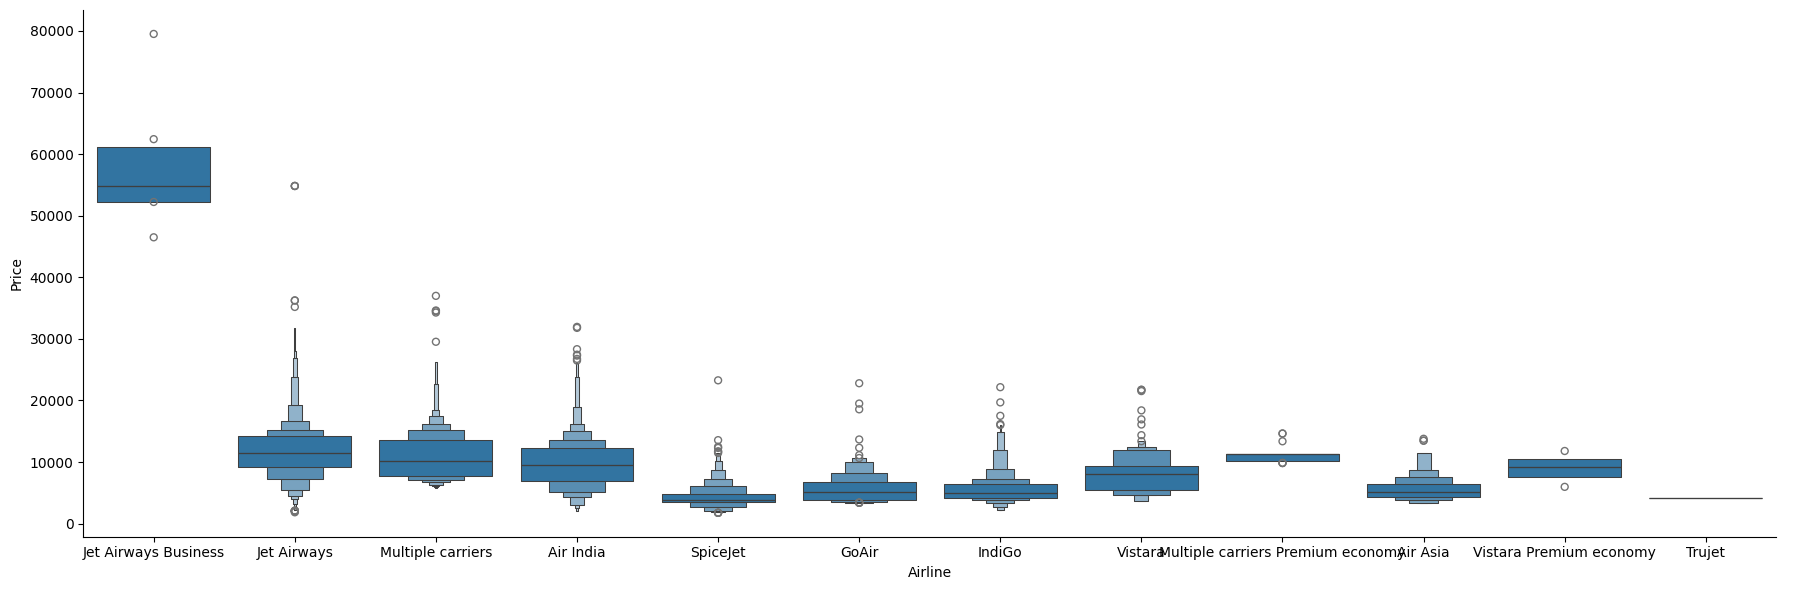

In [20]:
# Airlines vs Price
sns.catplot(y="Price", x="Airline",data = train_data.sort_values("Price", ascending=False), kind="boxen", height=6, aspect=3)
plt.show()

## Analyzing the above Graph
 From the graph we can see that Jet Airways Business have the highest Price.
 
 Apart from the Jet Airways Business all the other airways have the similar median.

In [21]:
# One-hot encoding with binary values
Airline = train_data["Airline"]
Airline = pd.get_dummies(Airline, drop_first=True).astype(int)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [22]:
train_data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

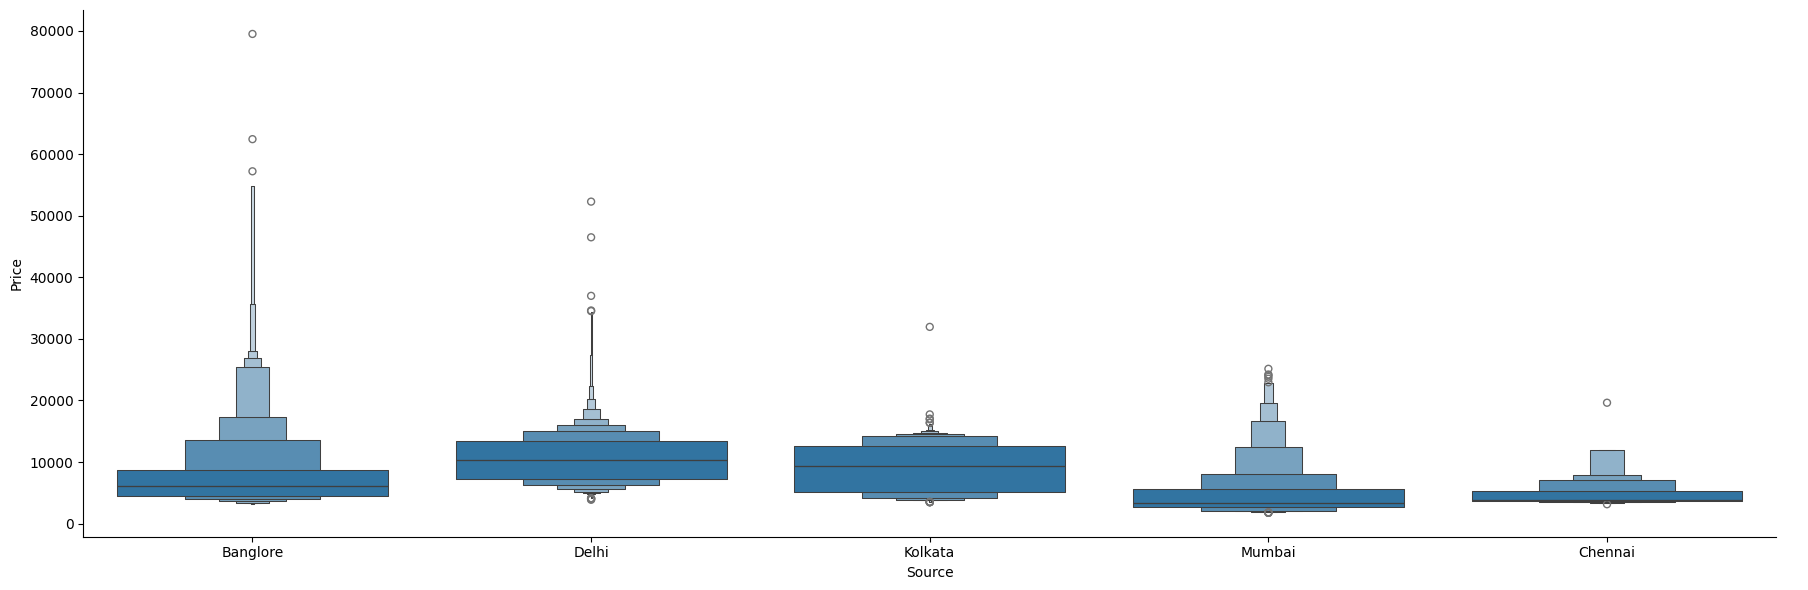

In [23]:
sns.catplot(
    y="Price", 
    x="Source", 
    data=train_data.sort_values("Price", ascending=False), 
    kind="boxen", 
    height=6, 
    aspect=3
)
plt.show()


In [24]:
# As sourse is also a nominal categotry so we will perform one hot Encoding.
Source = train_data[["Source"]]
Source = pd.get_dummies(Source, drop_first=True).astype(int)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [25]:
train_data["Destination"].value_counts()


Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [26]:
Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first=True).astype(int)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [27]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [28]:
# Since additional Infor has almost all the data as no info && The route info can we found out from the number if stops we can drop these datas.
train_data.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [29]:
train_data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [30]:
train_data["Total_Stops"] = train_data["Total_Stops"].replace(
    {"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}
)
train_data.head()

/var/folders/3z/d1jwn7z97g79wqn41nkp6v4m0000gq/T/ipykernel_74777/318721613.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data["Total_Stops"] = train_data["Total_Stops"].replace(


,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [31]:
data_train = pd.concat([train_data, Airline, Source,Destination], axis = 1)

In [32]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [33]:
data_train.drop(["Airline", "Source","Destination"],axis=1,inplace=True)

In [34]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
data_train.shape

(10682, 30)

Now we perform the exact same steps for test data set.The test data contains the similar data as above but here the price colum is not available as we are trying to fins the predicted price for the test data.

In [36]:
test_data = pd.read_excel(r"Test_set.xlsx")

In [37]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [38]:
test_data.dropna(inplace=True)
test_data['Journey_day'] = pd.to_datetime(test_data.Date_of_Journey, format= "%d/%m/%Y").dt.day
test_data['Journey_month'] = pd.to_datetime(test_data['Date_of_Journey'], format= "%d/%m/%Y").dt.month
# Since we have extracted date and month from Date of journey Coloumn we now don't need Date_of_Journey Column

test_data.drop(["Date_of_Journey"],axis=1,inplace=True)
#Extracting hour
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour

#Extracting minute
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute

#Since we have extracted hour and minute from Dep_time now we can drop it
test_data.drop(["Dep_Time"],axis=1,inplace=True)

# Similar to above now we can extract hour and minutes from arrival time and final drop it.
#Extracting hour
test_data["Arrival_hour"] = pd.to_datetime(test_data["Arrival_Time"]).dt.hour

#Extracting minute
test_data["Arrival_min"] = pd.to_datetime(test_data["Arrival_Time"]).dt.minute

#Since we have extracted hour and minute from Dep_time now we can drop it
test_data.drop(["Arrival_Time"],axis=1,inplace=True)

duration = list(test_data["Duration"])

# Ensure each entry has both hours and minutes in the correct format
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  # Add a space before "0m"
        else:
            duration[i] = "0h " + duration[i]

# Extract hours and minutes
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    # Extract hours and convert to integer
    duration_hours.append(int(duration[i].split(sep="h")[0].strip()))
    # Extract minutes and convert to integer
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1].strip()))
print("Duration:", duration, "\nHours:", duration_hours, "\nMinutes:", duration_mins)

test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.head()

test_data.drop(["Duration"], axis=1, inplace= True)
test_data.head()


# One-hot encoding with binary values
Airline = test_data["Airline"]
Airline = pd.get_dummies(Airline, drop_first=True).astype(int)
Airline.head()

Source = test_data[["Source"]]
Source = pd.get_dummies(Source, drop_first=True).astype(int)

Destination = test_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first=True).astype(int)

# Since additional Infor has almost all the data as no info && The route info can we found out from the number if stops we can drop these datas.
test_data.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

test_data["Total_Stops"] = test_data["Total_Stops"].replace(
    {"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}
)
data_test = pd.concat([test_data, Airline, Source,Destination], axis = 1)

data_test.drop(["Airline", "Source","Destination"],axis=1,inplace=True)


Duration: ['10h 55m', '4h 0m', '23h 45m', '13h 0m', '2h 50m', '18h 20m', '15h 5m', '5h 15m', '2h 45m', '6h 5m', '28h 55m', '9h 20m', '10h 15m', '4h 40m', '17h 20m', '10h 50m', '9h 15m', '12h 15m', '9h 10m', '9h 20m', '14h 50m', '14h 5m', '11h 35m', '13h 30m', '2h 50m', '12h 25m', '2h 30m', '25h 30m', '19h 25m', '7h 0m', '2h 30m', '11h 40m', '7h 5m', '3h 0m', '1h 25m', '2h 40m', '1h 25m', '6h 5m', '17h 5m', '10h 40m', '2h 30m', '12h 30m', '1h 30m', '23h 40m', '5h 15m', '2h 20m', '23h 35m', '1h 30m', '27h 40m', '13h 30m', '28h 20m', '5h 45m', '26h 25m', '5h 40m', '2h 15m', '2h 55m', '5h 45m', '7h 30m', '5h 20m', '25h 50m', '13h 15m', '26h 20m', '5h 45m', '5h 40m', '2h 40m', '2h 50m', '5h 25m', '8h 45m', '3h 0m', '7h 20m', '1h 30m', '21h 10m', '16h 0m', '7h 50m', '1h 30m', '3h 0m', '2h 50m', '19h 25m', '2h 55m', '14h 5m', '2h 50m', '16h 5m', '5h 55m', '2h 30m', '10h 15m', '13h 50m', '2h 15m', '11h 55m', '2h 30m', '13h 20m', '18h 10m', '28h 10m', '5h 0m', '23h 15m', '1h 15m', '1h 20m', '13

/var/folders/3z/d1jwn7z97g79wqn41nkp6v4m0000gq/T/ipykernel_74777/1118154230.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
/var/folders/3z/d1jwn7z97g79wqn41nkp6v4m0000gq/T/ipykernel_74777/1118154230.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
/var/folders/3z/d1jwn7z97g79wqn41nkp6v4m0000gq/T/ipykernel_74777/1118154230.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_hour"] = pd.to_datetime(test_data[

In [39]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [40]:
data_test.info()
data_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        2671 non-null   int64
 1   Journey_day                        2671 non-null   int32
 2   Journey_month                      2671 non-null   int32
 3   Dep_hour                           2671 non-null   int32
 4   Dep_min                            2671 non-null   int32
 5   Arrival_hour                       2671 non-null   int32
 6   Arrival_min                        2671 non-null   int32
 7   Duration_hours                     2671 non-null   int64
 8   Duration_mins                      2671 non-null   int64
 9   Air India                          2671 non-null   int64
 10  GoAir                              2671 non-null   int64
 11  IndiGo                             2671 non-null   int64
 12  Jet Airways         

(2671, 28)

# Feature Selection
Finding out the best feature which will contribute and have good relation with target variable.Following are some of the feature selection methods,
<li> heatmap </li>
<li> feature_importance_ </li>
<li> SelectKBest </li>

In [41]:
data_train.shape

(10682, 30)

In [42]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [43]:
X = data_train.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [44]:
y = data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

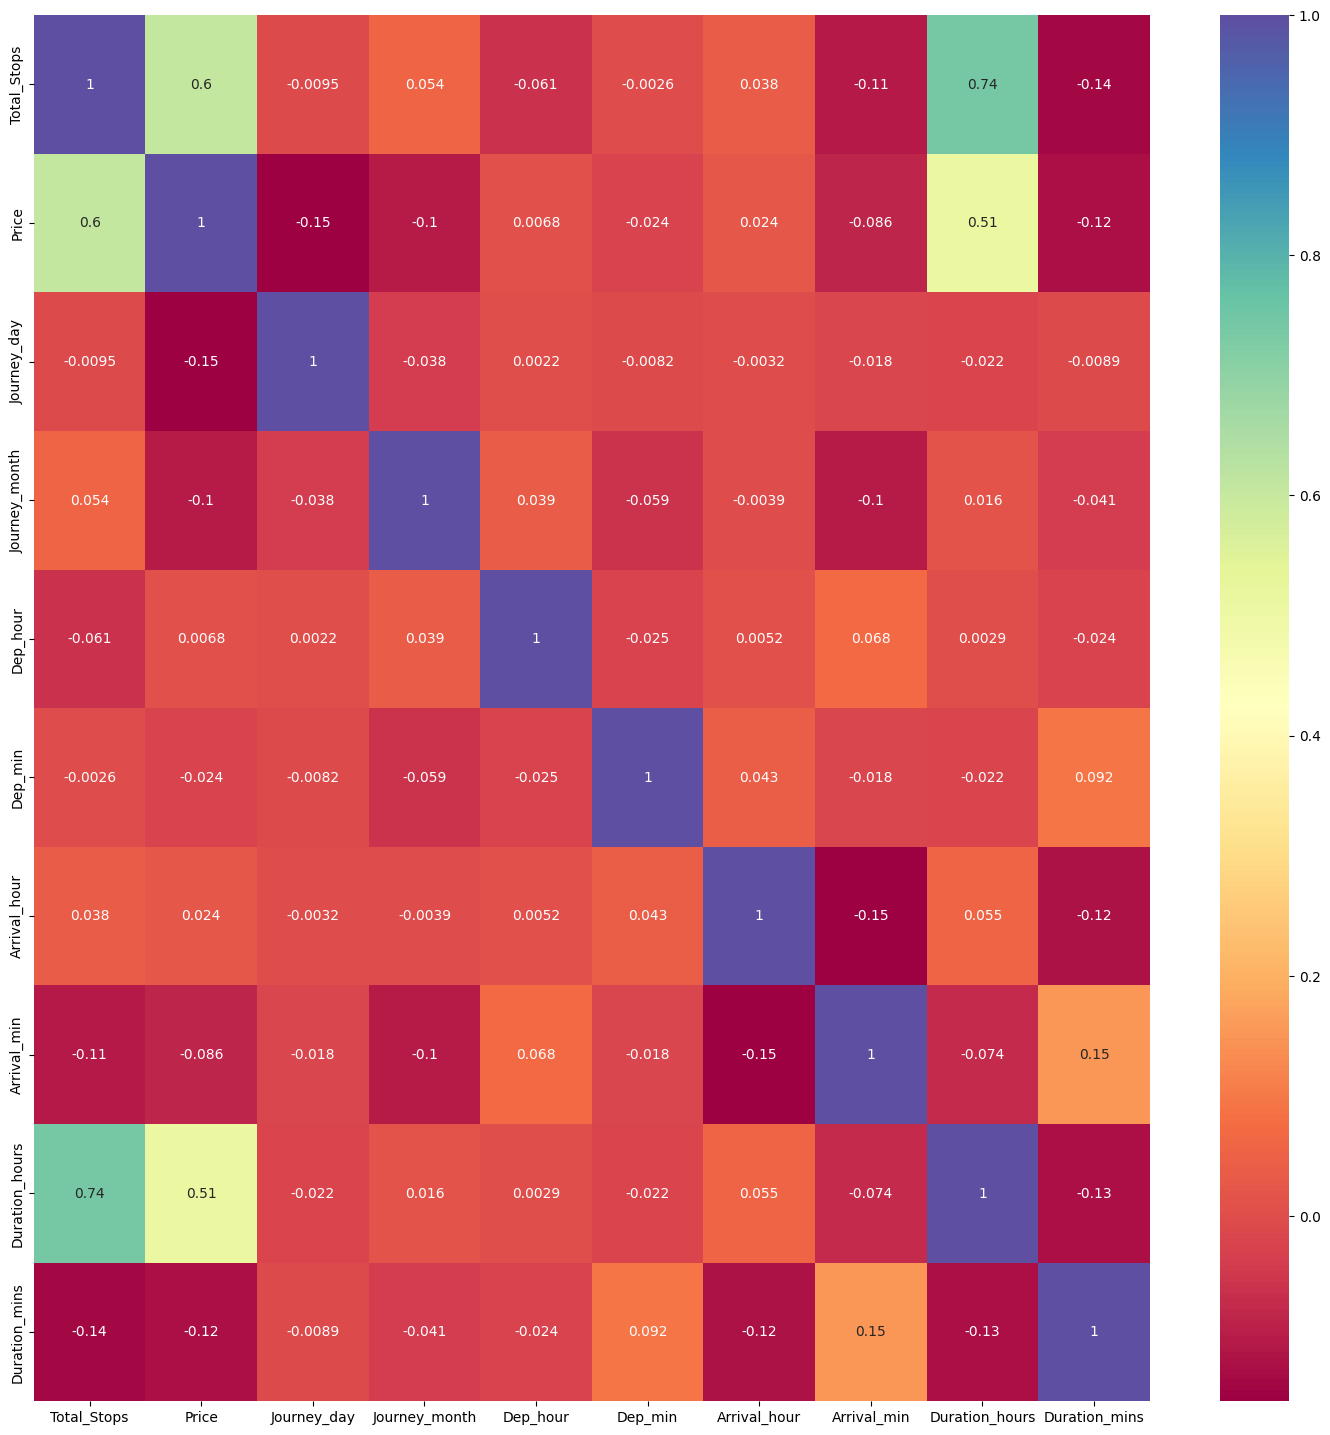

In [45]:
# Finds the correlation between Independent and Dependent attributes

# Filter only numeric columns
numeric_data = train_data.select_dtypes(include=[float, int])

# Plot the heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(numeric_data.corr(), annot=True, cmap="Spectral")
plt.show()


In [46]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [47]:
print(selection.feature_importances_)

[2.10933685e-01 1.43663457e-01 5.39094536e-02 2.48115358e-02
 2.11129095e-02 2.81586563e-02 1.91196167e-02 1.33231892e-01
 1.70776726e-02 8.90375462e-03 1.76549122e-03 1.60432766e-02
 1.42882403e-01 6.75534114e-02 2.15371139e-02 9.11127173e-04
 3.02627411e-03 9.89135153e-05 4.93117929e-03 9.02563799e-05
 5.75965187e-04 9.88012340e-03 3.31660024e-03 6.08725551e-03
 1.11951189e-02 1.64588106e-02 7.46501986e-03 3.68148107e-04
 2.48908777e-02]


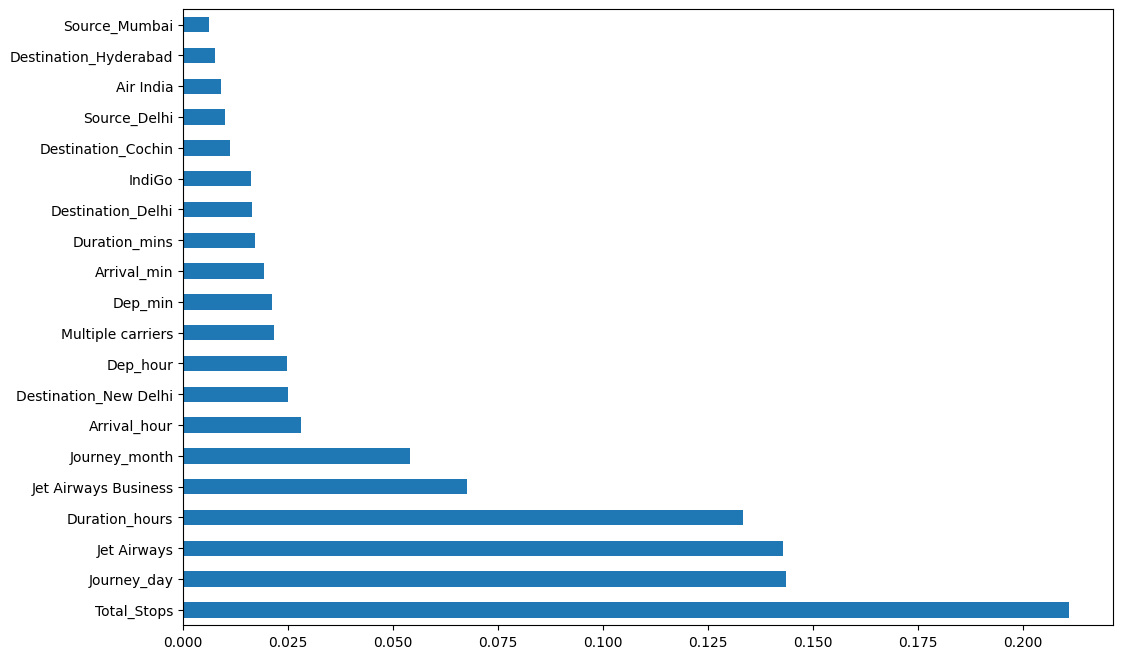

In [48]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


---

## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
y_pred = reg_rf.predict(X_test)

In [52]:
reg_rf.score(X_train, y_train)

0.9527713961700953

In [53]:
reg_rf.score(X_test, y_test)

0.7983955260028244

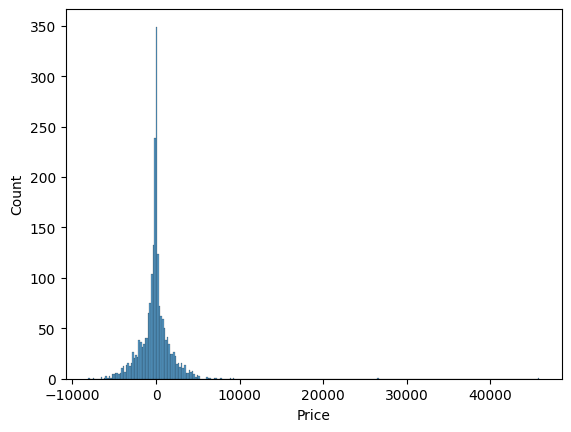

In [54]:
sns.histplot(y_test-y_pred)
plt.show()

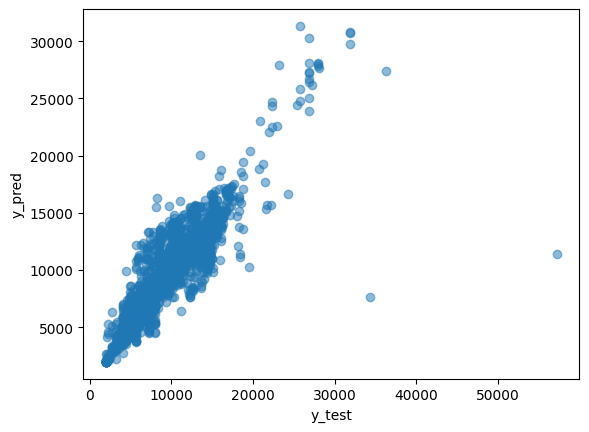

In [55]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [56]:
from sklearn import metrics

In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1172.452094036832
MSE: 4347007.023530113
RMSE: 2084.947726809982


In [58]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [59]:
metrics.r2_score(y_test, y_pred)

0.7983955260028244

---

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [60]:
from sklearn.model_selection import RandomizedSearchCV
reg_rf = RandomForestRegressor()

In [61]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['sqrt', 'log2']  # Replace 'auto' with 'sqrt' or 'log2'

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [62]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [63]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, 
                               scoring='neg_mean_squared_error', n_iter=10, 
                               cv=5, verbose=2, random_state=42, n_jobs=-1)

In [64]:
X_train = X_train.fillna(X_train.mean())  # Impute NaNs in X_train
y_train = y_train.fillna(y_train.mean())  # Impute NaNs in y_train

# Check for infinite values and replace with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train = X_train.fillna(X_train.mean())

In [65]:
print(X_train.dtypes)

Total_Stops                          int64
Journey_day                          int32
Journey_month                        int32
Dep_hour                             int32
Dep_min                              int32
Arrival_hour                         int32
Arrival_min                          int32
Duration_hours                       int64
Duration_mins                        int64
Air India                            int64
GoAir                                int64
IndiGo                               int64
Jet Airways                          int64
Jet Airways Business                 int64
Multiple carriers                    int64
Multiple carriers Premium economy    int64
SpiceJet                             int64
Trujet                               int64
Vistara                              int64
Vistara Premium economy              int64
Source_Chennai                       int64
Source_Delhi                         int64
Source_Kolkata                       int64
Source_Mumb

In [66]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimato

/Users/bhuwan/Desktop/auth-fast-api/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.1s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   6.0s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   6.1s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   6.2s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.1s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.1s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.1s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   6.2s
[CV] END max_depth=5, max_featur

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [67]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [70]:
prediction = rf_random.predict(X_test)

In [ ]:
# plt.figure(figsize = (8,8))
# sns.histplotplot(y_test-prediction)
# plt.show()

AttributeError: module 'seaborn' has no attribute 'histplotplot'

<Figure size 800x800 with 0 Axes>

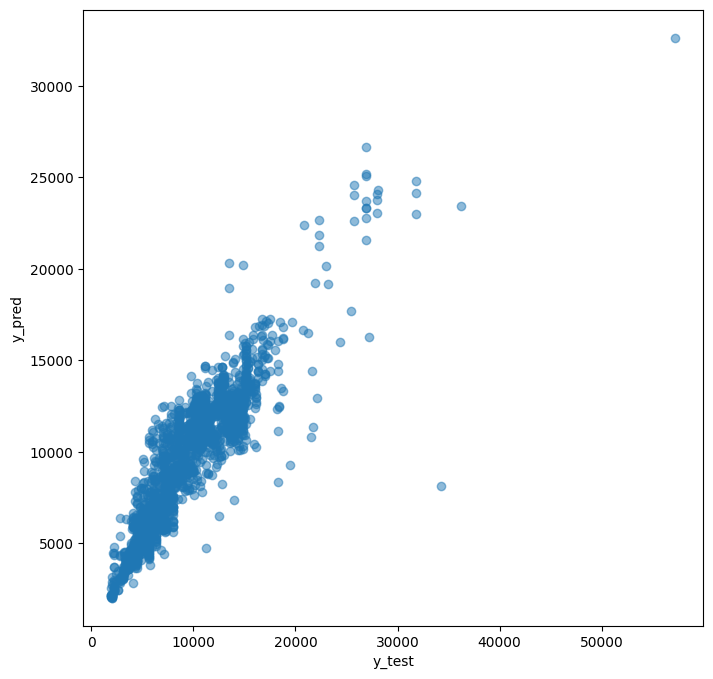

In [71]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

---

## Saving the model to reuse it again

In [72]:
import pickle
# Save the best model (the model after hyperparameter tuning)
with open('flight_price_rf.pkl', 'wb') as file:
    pickle.dump(rf_random.best_estimator_, file)
print("Best Parameters:", rf_random.best_params_)

Best Parameters: {'n_estimators': 700, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


# Loading and Predicting Using the Saved Model:

In [73]:
# Load the saved best model
with open('flight_price_rf.pkl', 'rb') as file:
    forest = pickle.load(file)

# Make predictions using the loaded model
y_prediction = forest.predict(X_test)

# Evaluate the model's performance
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))


MAE: 1290.050598144594
MSE: 3909820.9313980862
RMSE: 1977.3267133678455


In [74]:
metrics.r2_score(y_test, y_prediction)

0.8186712402278228

In [76]:
sample_input = np.array(
    [[
        1,
        12,
        5,
        18,
        5,
        23,
        30,
        5,
        25,
        0,
        0,
        1,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        1,
        0,
        0,
        0,
        0,
        0,
        11,]
    ]
)
predicted_price = forest.predict(sample_input)
print("Predicted Price:", predicted_price[0])


Predicted Price: 7002.442931748975


/Users/bhuwan/Desktop/auth-fast-api/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
